# Tik Tok Case Study
Author: Brent Artuch <br>
Date: 2023-06-17

## Introduction

This case study is one of the projects from the Google Advanced Data Analytics Certifications.

<b> Goal: </b>
The TikTok data team is developing a machine learning model for classifying claims made in videos submitted to the platform.

<b> Scenario: </b>
TikTok is the leading destination for short-form mobile video. The platform is built to help imaginations thrive. TikTok's
mission is to create a place for inclusive, joyful, and authentic content–where people can safely discover, create, and connect.

<b> Background on the TikTok Scenario: </b>
At TikTok, our mission is to inspire creativity and bring joy. Our employees lead with curiosity and move at the speed of culture.
Combined with our company's flat structure, you'll be given dynamic opportunities to make a real impact on a rapidly expanding
company and grow your career.

TikTok users have the ability to submit reports that identify videos and comments that contain user claims. These reports identify
content that needs to be reviewed by moderators. The process generates a large number of user reports that are challenging to
consider in a timely manner.

TikTok is working on the development of a predictive model that can determine whether a video contains a claim or offers an
opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

<b> Note: </b> <i> The story, all names, characters, and incidents portrayed in this project are fictitious. No identification with
actual persons (living or deceased) is intended or should be inferred. And, the data shared in this project has been created for
pedagogical purposes. </i>

## Step 1: Imports
### Import libraries

In [1]:
# Packages for data manipulation
import pandas as pd
import numpy as np

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset.

In [2]:
data = pd.read_csv("dataset/tiktok_dataset.csv")

## Step 2: Inspect Data


In [3]:
data.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
data.size

232584

In [5]:
data.shape

(19382, 12)

In [6]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


## Step 3: Data Visualizations
Create a boxplot to examine the spread of values in `video_duration_sec` column.

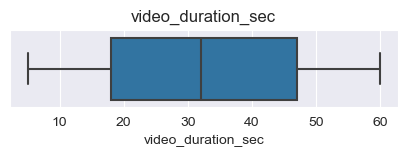

In [7]:
plt.figure(figsize=(5,1))
plt.title('video_duration_sec')
sns.boxplot(x=data['video_duration_sec']);

Create a histogram of the values in the `video_duration_sec` column.

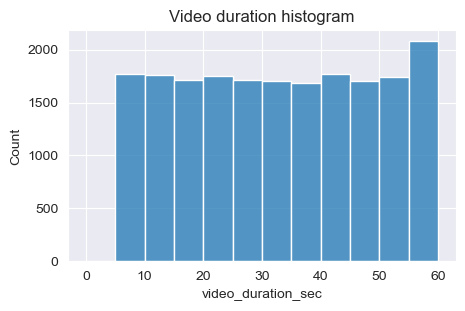

In [8]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
plt.title('Video duration histogram');

Create a boxplot to examine the spread of values in the `video_view_count` column.

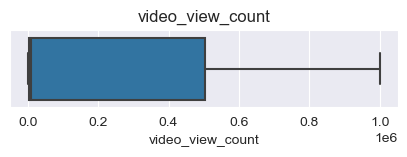

In [9]:
plt.figure(figsize=(5,1))
plt.title('video_view_count')
sns.boxplot(x=data['video_view_count']);

Create a histogram of values in the `video_view_count` column.

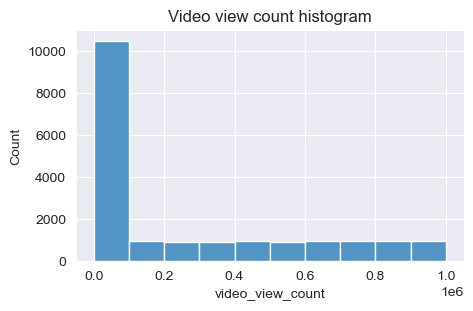

In [10]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_view_count'], bins=range(0,10**6+1,10**5))
plt.title('Video view count histogram');

Create a box plot to examine hte spread of values in `video_like_count` column.

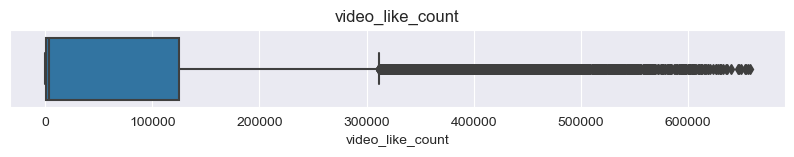

In [11]:
plt.figure(figsize=(10,1))
plt.title('video_like_count')
sns.boxplot(x=data['video_like_count']);

Create a histogram of the values in `video_like_count`.

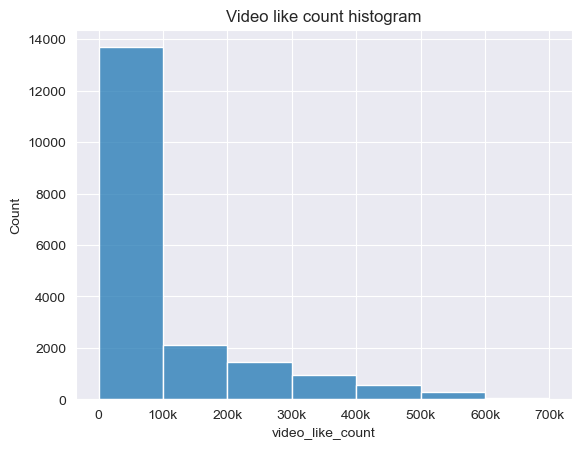

In [12]:
fig = sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
fig.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Video like count histogram');

Create box plot to examine the spread of values in the `video_comment_count` column.

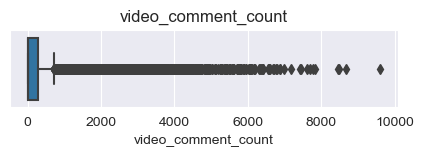

In [13]:
plt.figure(figsize=(5,1))
plt.title('video_comment_count')
sns.boxplot(x=data['video_comment_count']);

Create a histogram of the values in the `video_comment_count` column.

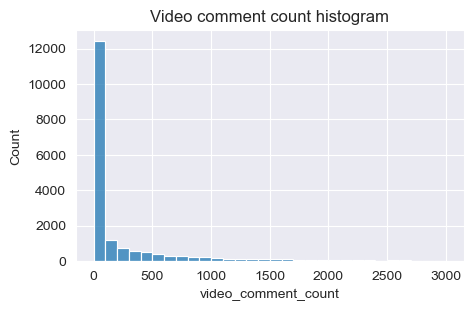

In [14]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_comment_count'], bins=range(0, 3001, 100))
plt.title('Video comment count histogram');

Create a boxplot to examine the spread of values in the `video_share_count` column.

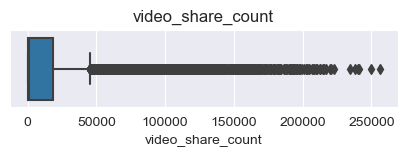

In [15]:
plt.figure(figsize=(5,1))
plt.title('video_share_count')
sns.boxplot(x=data['video_share_count']);

Create a histogram of the values in the `video_share_count` column.

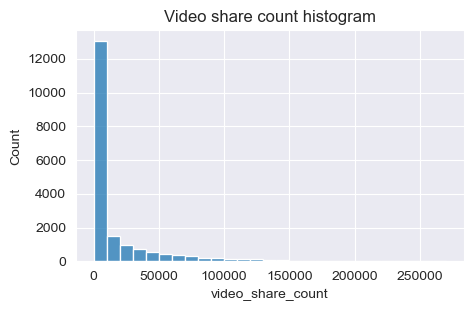

In [16]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins=range(0, 270001, 10000))
plt.title('Video share count histogram');

Create a boxplot to examine the spread of values in the `video_download_count` column.

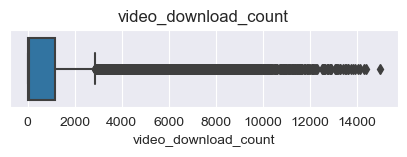

In [17]:
plt.figure(figsize=(5,1))
plt.title('video_download_count')
sns.boxplot(x=data['video_download_count']);

Create a histogram of the values in `video_download_count` column.

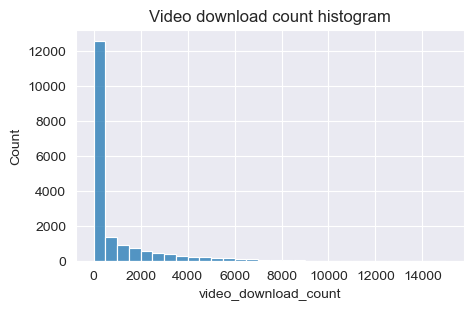

In [18]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_download_count'], bins=range(0, 15001, 500))
plt.title('Video download count histogram');

### Claim status by verification status
Now, create a histogram with four bars: one for each combination of the claim status and verification status.

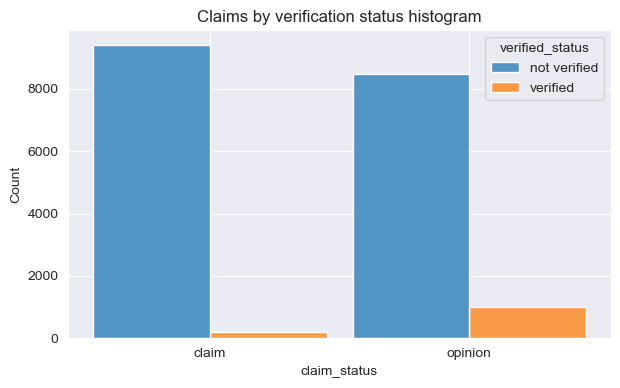

In [19]:
plt.figure(figsize=(7,4))
sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram');

### Claim status by author ban status

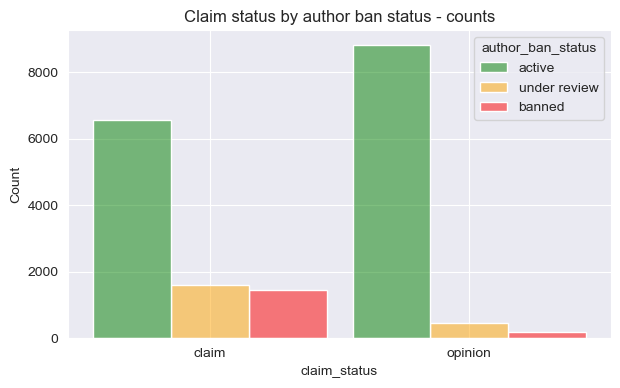

In [20]:
fig = plt.figure(figsize=(7,4))
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

### Median view counts by ban status

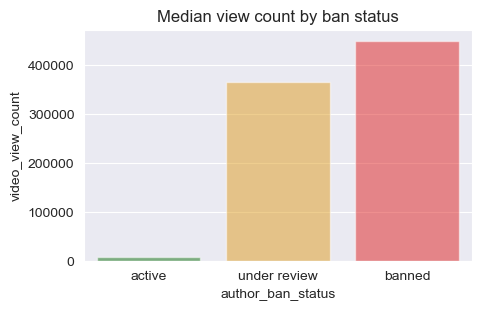

In [21]:
ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status');

In [23]:
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

### Total views by claim status
Create a pie graph that depicts the proportions of total views for claim videos and the total views
for opinion videos.

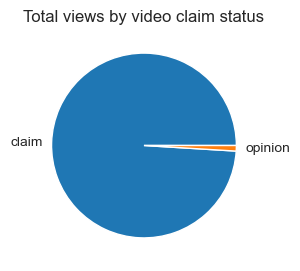

In [24]:
fig = plt.figure(figsize=(3,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim','opinion'])
plt.title('Total views by video claim status');

## Step 4: Determine Outliers

In [28]:
count_cols = [
    'video_view_count',
    'video_like_count',
    'video_share_count',
    'video_download_count',
    'video_comment_count'
]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


### Scatterplot

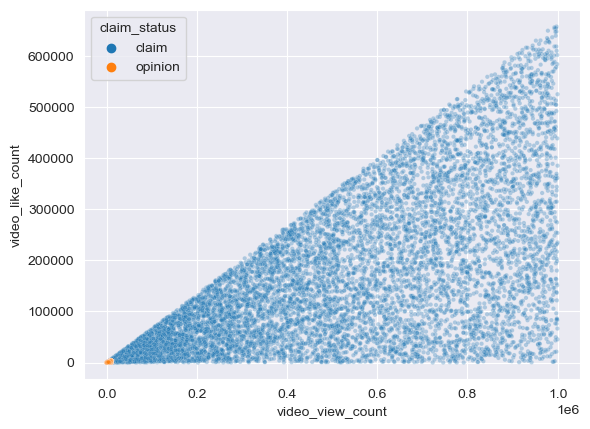

In [29]:
# Create scatterplot of `video_like_count` versus `video_comment_count` according to `claim_status`
sns.scatterplot(x=data['video_view_count'], y=data['video_like_count'],
                hue=data['claim_status'], s=10, alpha=0.3)
plt.show()

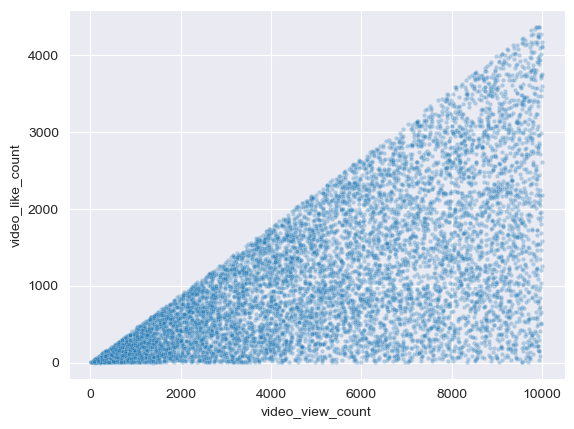

In [30]:
# Create scatterplot of `video_like_count` versus `video_comment_count` for opinions only
opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion['video_view_count'], y=opinion['video_like_count'],
                s=10, alpha=0.3)
plt.show()